<a href="https://colab.research.google.com/github/hwllffrdd/Bezrealitky-Scraper-3000/blob/master/bezrealitky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

Import the output data with apartments for rent:

In [ ]:
data = pd.read_csv('output_data_najmy.csv', sep=';')

In [ ]:
print(data.shape)
print(data.columns)
print(data.isna().values.any())
print(data.duplicated().values.any())

(1142, 5)
Index(['Name', 'Type', 'Area', 'Notes', 'Price'], dtype='object')
False
True


Check for missing data.

In [ ]:
missing_data = data[data.isna().any(axis=1)]
missing_data

,Name,Type,Area,Notes,Price


Check for duplicated data (they are fine though, there can easily be multiple "identical" apartments).

In [ ]:
duplicated_data = data[data.duplicated(keep=False)]
duplicated_data

,Name,Type,Area,Notes,Price
34,"Černokostelecká, Říčany - Říčany u Prahy, Stře...",1+kk,30,MHD 2 minuty pěšky • Vybaveno • Výtah,24120
35,"Černokostelecká, Říčany - Říčany u Prahy, Stře...",1+kk,30,MHD 2 minuty pěšky • Vybaveno • Výtah,24120
36,"Černokostelecká, Říčany - Říčany u Prahy, Stře...",1+kk,30,MHD 2 minuty pěšky • Vybaveno • Výtah,24120
37,"Černokostelecká, Říčany - Říčany u Prahy, Stře...",1+kk,30,MHD 2 minuty pěšky • Vybaveno • Výtah,24120
38,"Černokostelecká, Říčany - Říčany u Prahy, Stře...",1+kk,30,MHD 2 minuty pěšky • Vybaveno • Výtah,24120
46,"Mukařovského, Praha - Stodůlky",1+kk,30,Novostavba • Vybaveno • Výtah • Parkování,19900
48,"Mukařovského, Praha - Stodůlky",1+kk,30,Novostavba • Vybaveno • Výtah • Parkování,19900
546,"Prvního pluku, Praha - Karlín",1+kk,20,MHD 1 minuta pěšky • Vybaveno • Výtah,33716
583,"V háji, Praha - Holešovice",1+kk,38,MHD 2 minuty pěšky • Vybaveno • Výtah,20990
588,"Legerova, Praha - Nové Město",1+kk,35,MHD 2 minuty pěšky • Vybaveno • Výtah,23429


Check price distribution.

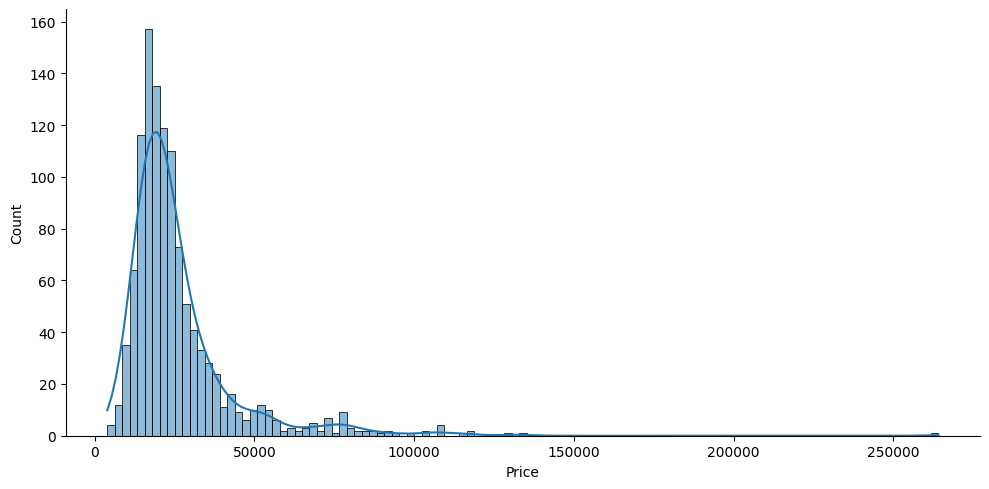

In [ ]:
sns.displot(data.Price, aspect=2, kind="hist", kde=True)

Check area distribution.

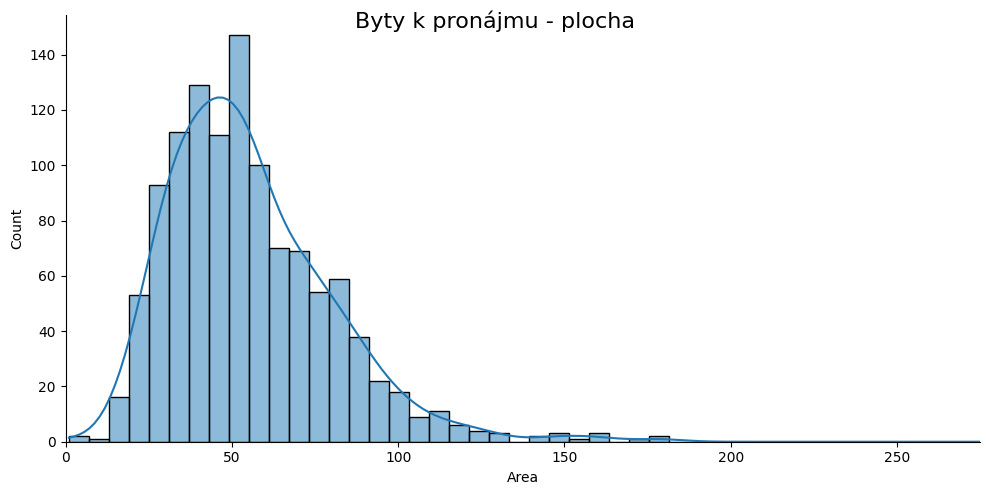

In [ ]:
g = sns.displot(data.Area, aspect=2, kind="hist", kde=True)
g.set(xlim=(0, 275))
g.fig.suptitle('Byty k pronájmu - plocha', fontsize=16)
plt.show()

Check type distribution

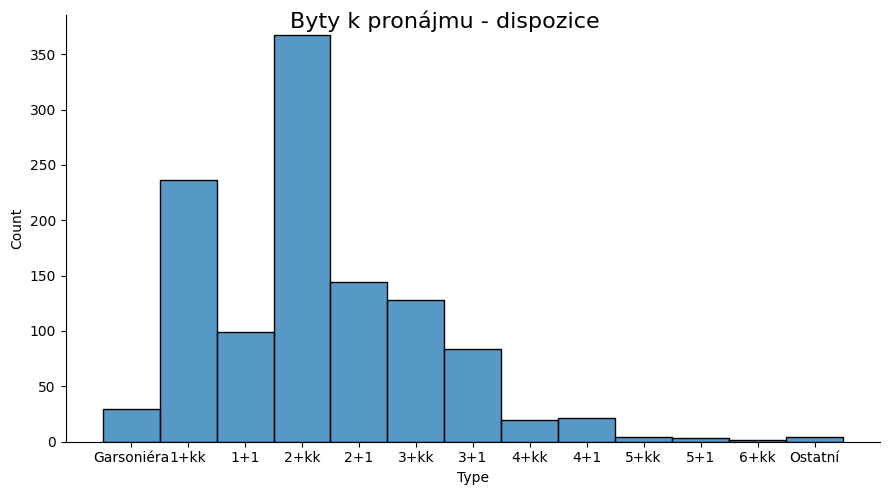

In [ ]:
order = ['Garsoniéra', '1+kk', '1+1', '2+kk', '2+1', '3+kk', '3+1', '4+kk', '4+1', '5+kk', '5+1', '6+kk', 'Ostatní']
data['Type'] = pd.Categorical(data['Type'], categories=order, ordered=True)
g = sns.displot(data.Type, aspect=1.8, kind="hist")
g.fig.suptitle('Byty k pronájmu - dispozice', fontsize=16)
plt.show()

If not sure what to do, you can always try what kind of pairplots are there

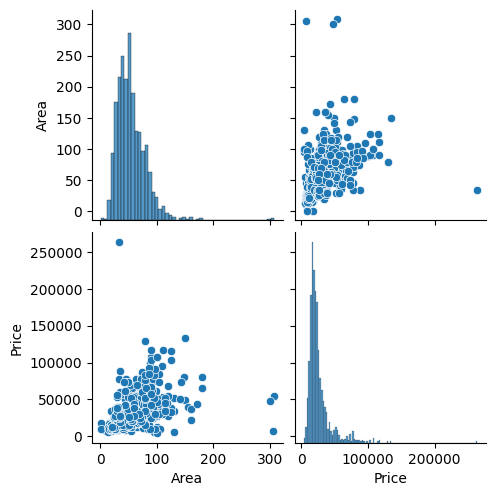

In [ ]:
sns.pairplot(data)

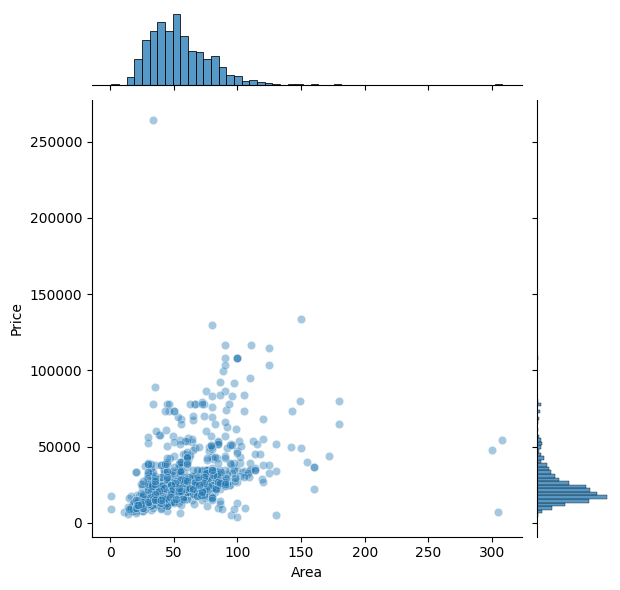

In [ ]:
sns.jointplot(data, x="Area", y="Price", joint_kws=dict(alpha=0.4))

Check Price vs. Type. There can be some weirdly looking datapoints, consider removing them.

(0.0, 150000.0)

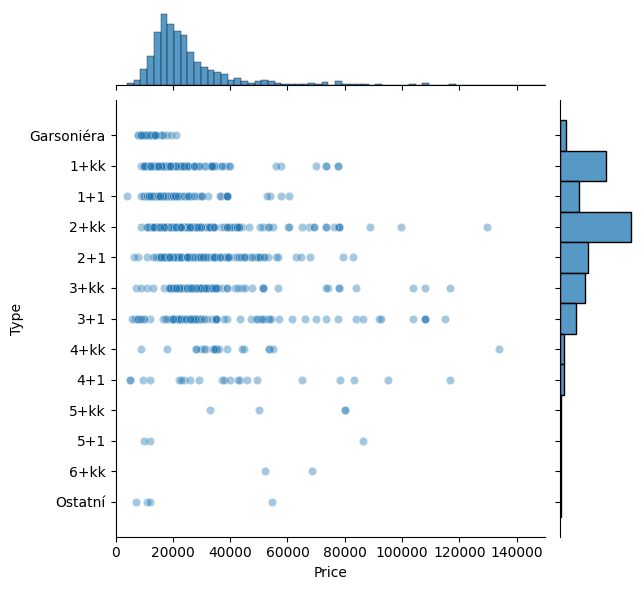

In [ ]:
g = sns.jointplot(data, x="Price", y="Type", joint_kws=dict(alpha=0.4))
g.ax_joint.set_xlim(left=0, right=150000)  # Example values, adjust as needed

In [ ]:
data_corr = pd.read_csv('output_data_najmy_corr.csv', sep=';')

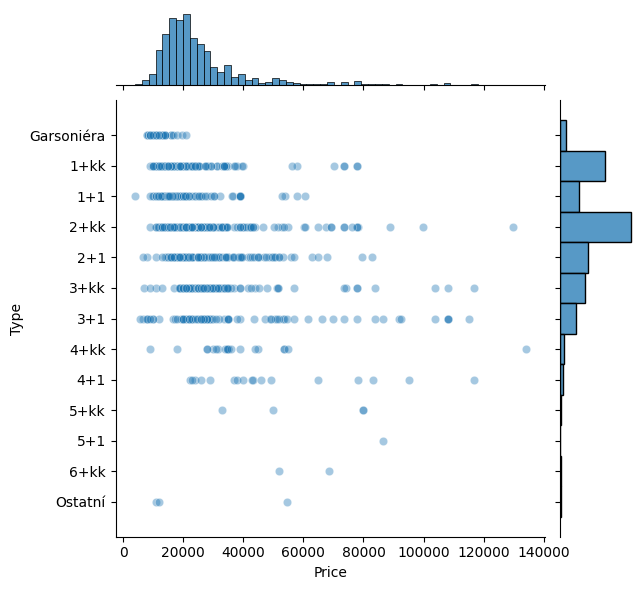

In [ ]:
data_corr['Type'] = pd.Categorical(data_corr['Type'], categories=order, ordered=True)
sns.jointplot(data_corr, x="Price", y="Type", joint_kws=dict(alpha=0.4))

Create 'District' by splitting the 'Name' data.

In [ ]:
data_corr[['Street', 'District']] = data_corr['Name'].str.split(',', n=1, expand=True)
data_corr['District'] = data_corr['District'].str.strip()
district_counts = data_corr['District'].value_counts()
district_counts

District
Praha - Vinohrady          72
Praha - Žižkov             63
Praha - Nové Město         63
Praha - Smíchov            56
Praha - Holešovice         55
                           ..
Praha - Dolní Počernice     1
Praha - Přední Kopanina     1
Praha - Slivenec            1
Praha - Pitkovice           1
Praha - Dolní Chabry        1
Name: count, Length: 87, dtype: int64

Limit to at leas 10 entries per district<br>
Display the data

In [120]:
districts_with_at_least_10 = data_corr['District'].value_counts()
districts_with_at_least_10 = districts_with_at_least_10[districts_with_at_least_10 >= 10]
data_filtered = data_corr[data_corr['District'].isin(districts_with_at_least_10.index)]

new_district_counts = data_filtered['District'].value_counts()
new_district_counts

District
Praha - Vinohrady      72
Praha - Nové Město     63
Praha - Žižkov         63
Praha - Smíchov        56
Praha - Holešovice     55
Praha - Karlín         49
Praha - Stodůlky       44
Praha - Nusle          39
Praha - Libeň          38
Praha - Strašnice      35
Praha - Vršovice       33
Praha - Staré Město    33
Praha - Hlubočepy      26
Praha - Záběhlice      25
Praha - Vysočany       25
Praha - Michle         24
Praha - Bubeneč        23
Praha - Chodov         23
Praha - Letňany        19
Praha - Hloubětín      17
Praha - Břevnov        17
Praha - Košíře         15
Praha - Prosek         14
Praha - Dejvice        13
Praha - Modřany        13
Praha - Jinonice       12
Praha - Podolí         12
Praha - Krč            12
Praha - Černý Most     11
Praha - Troja          11
Praha - Hostivař       11
Praha - Háje           11
Praha - Malá Strana    10
Praha - Uhříněves      10
Praha - Vokovice       10
Praha - Braník         10
Name: count, dtype: int64

Plot the averages

<Axes: xlabel='Price', ylabel='District'>

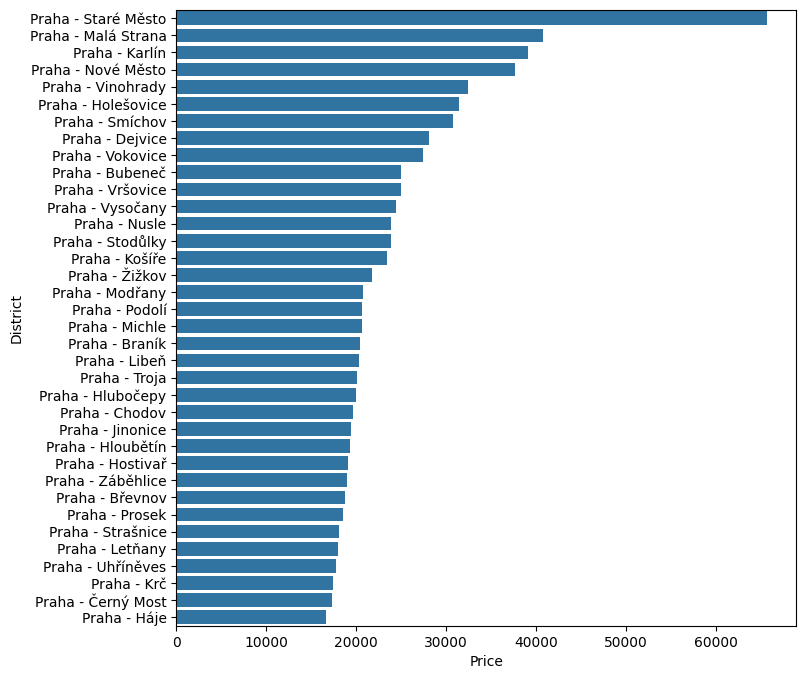

In [121]:
average_prices = data_filtered.groupby('District')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(average_prices, orient='h')

Order the district by average district<br>
Display the District vs. Price data

In [107]:
order_dist = average_prices.index.tolist()
data_filtered['District'] = pd.Categorical(data_filtered['District'], categories=order_dist, ordered=True)


<ipython-input-107-b06db1e625e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['District'] = pd.Categorical(data_filtered['District'], categories=order_dist, ordered=True)


<Figure size 1000x800 with 0 Axes>

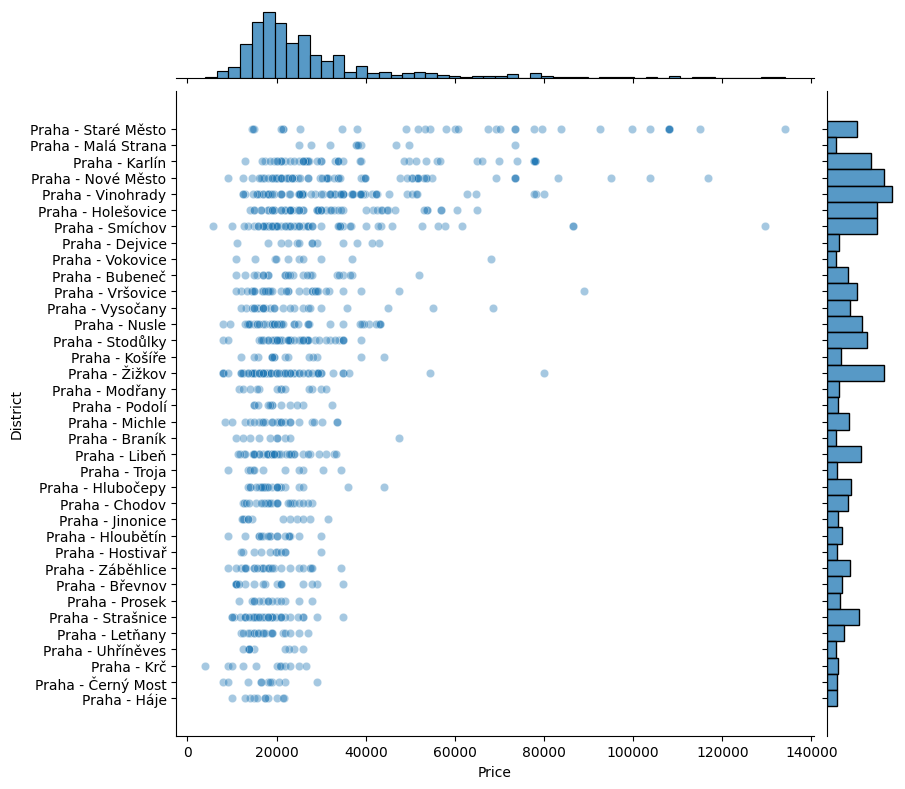

In [108]:
plt.figure(figsize=(10, 8))
sns.jointplot(data_filtered, x="Price", y="District", joint_kws=dict(alpha=0.4), height=8, ratio=8)

The same kind of data as heatmap

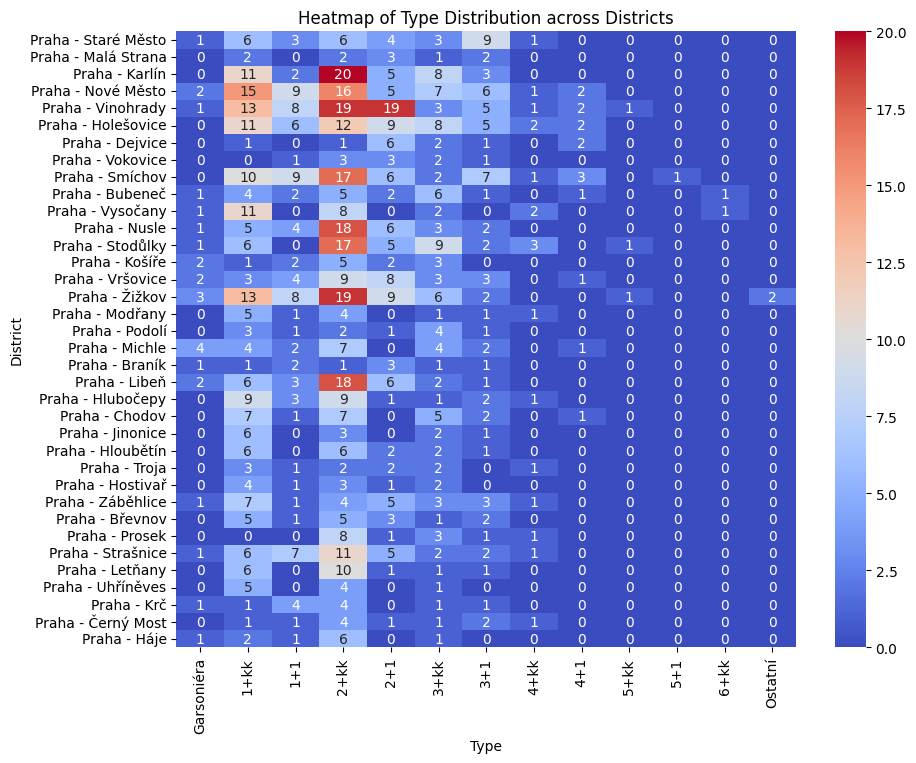

In [46]:
type_district_matrix = data_filtered.pivot_table(index='District', columns='Type', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(type_district_matrix, annot=True, cmap='coolwarm', fmt="d")
plt.title('Heatmap of Type Distribution across Districts')
plt.ylabel('District')
plt.xlabel('Type')
plt.show()


Stacked bar chart of types by district

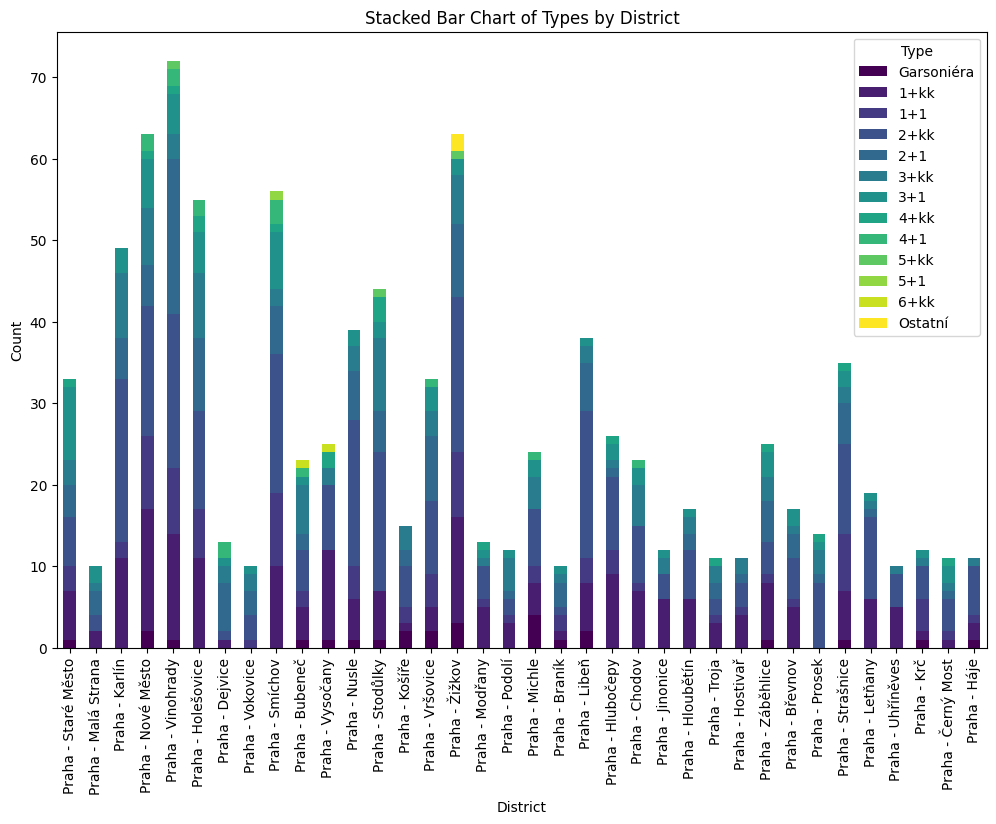

In [47]:
# Create a crosstab for the stacked bar plot
type_district_crosstab = pd.crosstab(data_filtered['District'], data_filtered['Type'])

# Plot the stacked bar chart
type_district_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Stacked Bar Chart of Types by District')
plt.ylabel('Count')
plt.xlabel('District')
plt.xticks(rotation=90)
plt.show()


Types by district by proportion

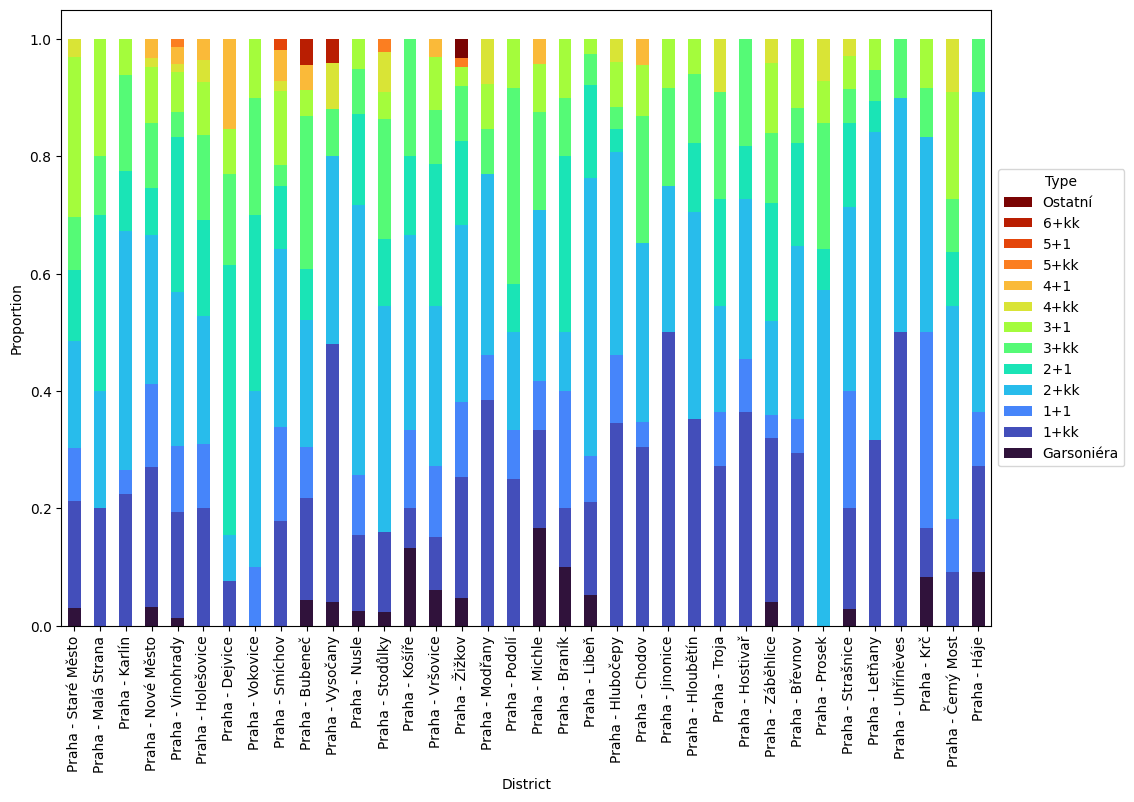

In [51]:
type_district_crosstab = pd.crosstab(data_filtered['District'], data_filtered['Type'])
type_district_proportions = type_district_crosstab.div(type_district_crosstab.sum(axis=1), axis=0)

ax = type_district_proportions.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='turbo')
plt.ylabel('Proportion')
plt.xlabel('District')
plt.xticks(rotation=90)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Display the previous scatterplot with the 'type' data included as color

<Figure size 1000x800 with 0 Axes>

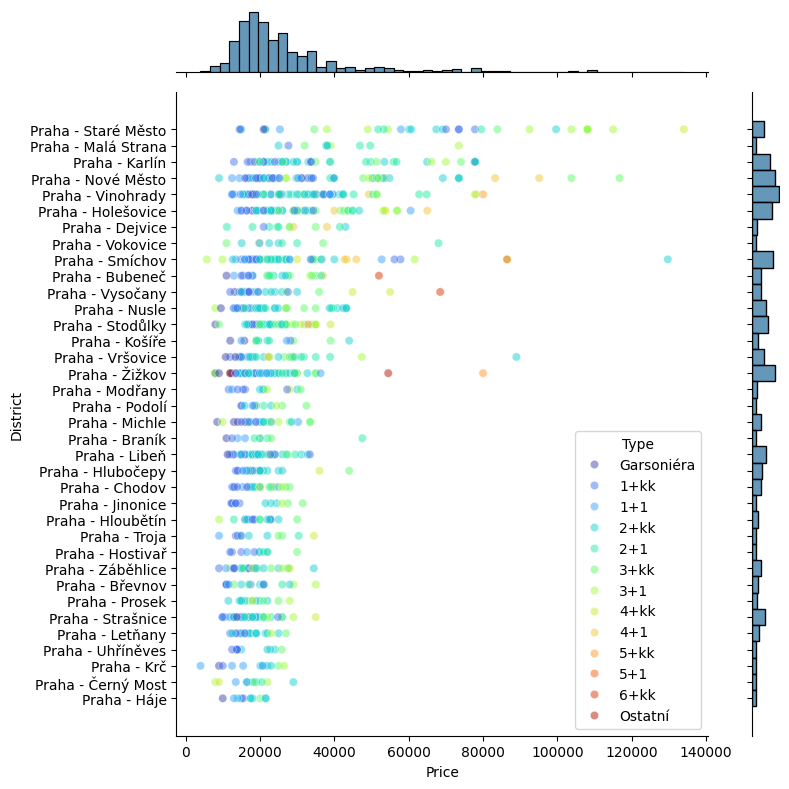

In [63]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 8))
g = sns.JointGrid(data=data_filtered, x="Price", y="District", height=8, ratio=8, space=0)
palette = sns.color_palette("turbo", n_colors=data_filtered['Type'].nunique())

sns.scatterplot(data=data_filtered, x="Price", y="District", hue="Type", palette=palette, ax=g.ax_joint, alpha=0.5)

sns.histplot(data=data_filtered, x="Price", color="#3274A1", ax=g.ax_marg_x)
sns.histplot(data=data_filtered, y="District", color="#3274A1", ax=g.ax_marg_y, orientation="horizontal")
g.ax_joint.legend(title='Type')
plt.tight_layout()
plt.show()

#The next part works with apartments for sale

In [64]:
data2 = pd.read_csv('output_data_prodej.csv', sep=';')

In [65]:
print(data2.shape)
print(data2.columns)
print(data2.isna().values.any())
print(data2.duplicated().values.any())

(601, 5)
Index(['Name', 'Type', 'Area', 'Notes', 'Price'], dtype='object')
False
True


In [66]:
duplicated_data = data2[data2.duplicated(keep=False)]
duplicated_data

,Name,Type,Area,Notes,Price
575,"Nad Krocínkou, Praha - Prosek",2+kk,56,MHD 1 minuta pěšky • Parkování • Garáž,9600000
578,"Nad Krocínkou, Praha - Prosek",2+kk,56,MHD 1 minuta pěšky • Parkování • Garáž,9600000


In [70]:
data3 = data2[~data2['Name'].str.contains('Středočeský kraj', na=False)]

The prices are in millions, so this has to be dealt with somehow

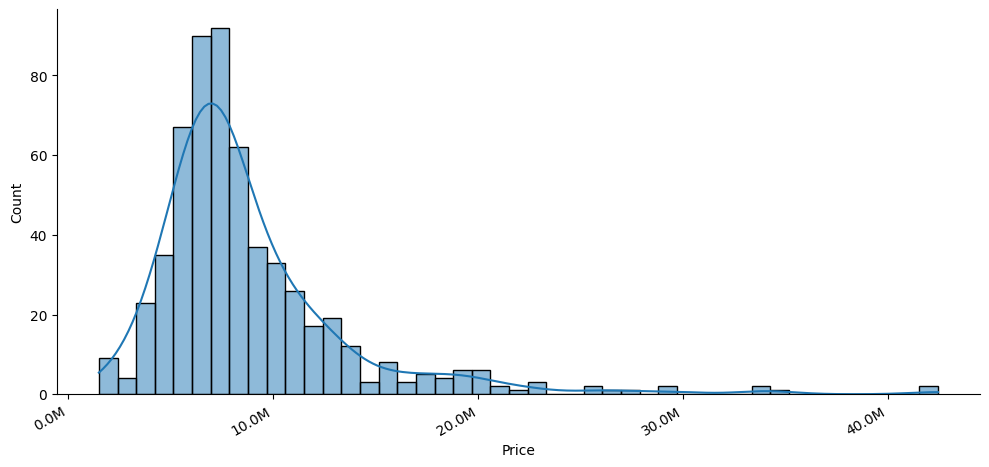

In [71]:
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'

g = sns.displot(data3['Price'], aspect=2, kind="hist", kde=True)

for ax in g.axes.flat:
    ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.gcf().autofmt_xdate()
plt.show()

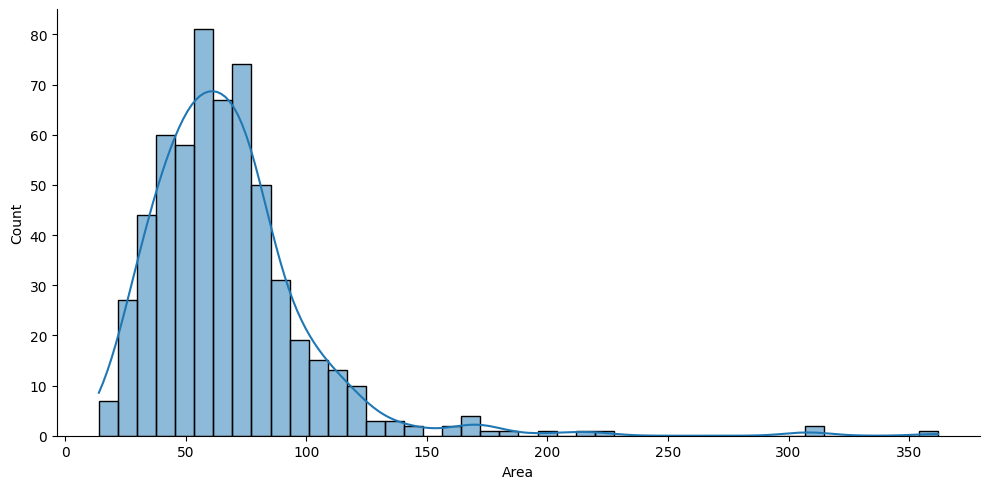

In [72]:
sns.displot(data3.Area, aspect=2, kind="hist", kde=True)

Compare the area and type distributions with apartments for rent

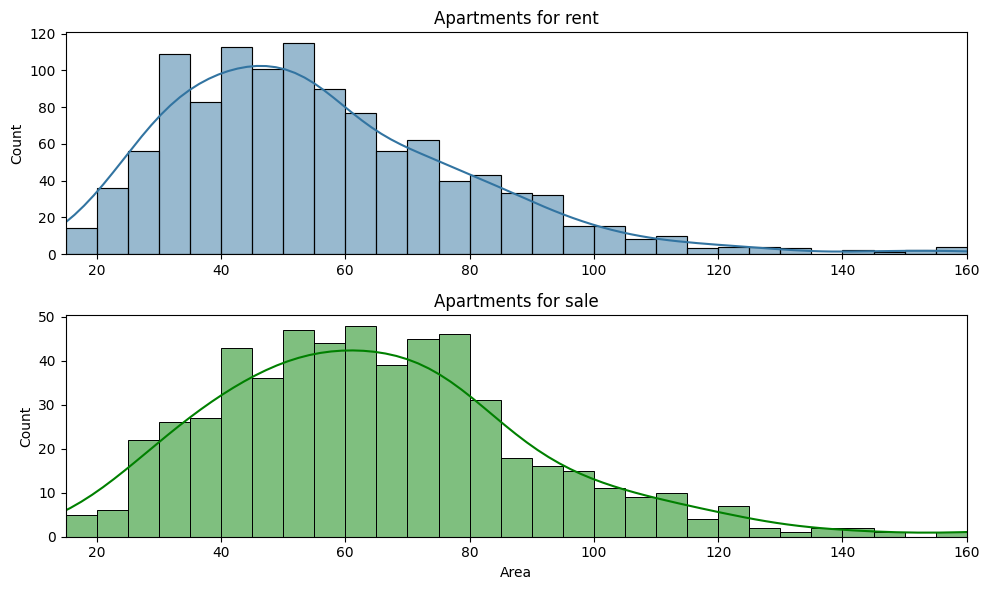

In [95]:
bin_edges = np.linspace(start=min(15, 15),
                        stop=max(160, 160), num=30)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

sns.histplot(data=data['Area'], kde=True, ax=axes[0], color='#3274A1', bins=bin_edges)
axes[0].set_title('Apartments for rent')
axes[0].set_xlabel('Area')
axes[0].tick_params(axis='x', labelbottom=True)

sns.histplot(data=data3['Area'], kde=True, ax=axes[1], color='green', bins=bin_edges)
axes[1].set_title('Apartments for sale')
axes[1].set_xlabel('Area')

x_min = min(15, 15)
x_max = max(160, 160)
axes[0].set_xlim(x_min, x_max)
axes[1].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

<ipython-input-99-565336a37eaa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Type'] = pd.Categorical(data3['Type'], categories=order, ordered=True)


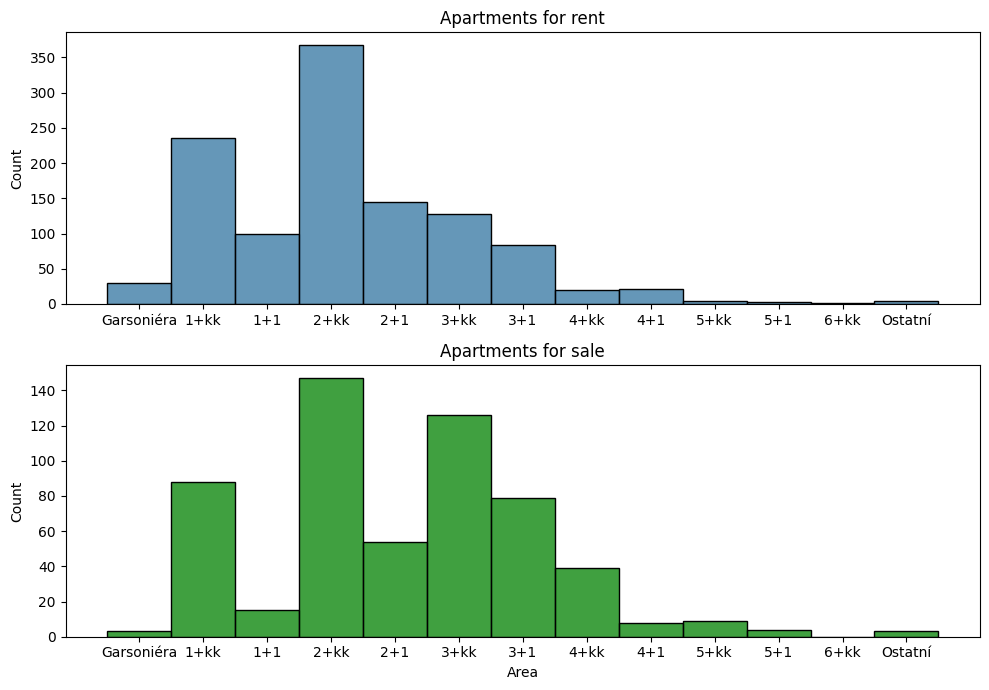

In [99]:
order = ['Garsoniéra', '1+kk', '1+1', '2+kk', '2+1', '3+kk', '3+1', '4+kk', '4+1', '5+kk', '5+1', '6+kk', 'Ostatní']
data['Type'] = pd.Categorical(data['Type'], categories=order, ordered=True)
data3['Type'] = pd.Categorical(data3['Type'], categories=order, ordered=True)

fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

sns.histplot(data=data['Type'], ax=axes[0], color='#3274A1')
axes[0].set_title('Apartments for rent')
axes[0].set_xlabel('Area')
axes[0].tick_params(axis='x', labelbottom=True)

sns.histplot(data=data3['Type'], ax=axes[1], color='green')
axes[1].set_title('Apartments for sale')
axes[1].set_xlabel('Area')

plt.tight_layout()
plt.show()

The rest is just a reprise of the way I worked with the data for apartments for rent.

In [100]:
data3[['Street', 'District']] = data3['Name'].str.split(',', n=1, expand=True)
data3['District'] = data3['District'].str.strip()
districts_with_at_least_5 = data3['District'].value_counts()
districts_with_at_least_5 = districts_with_at_least_5[districts_with_at_least_5 >= 5]
clean_data3 = data3[data3['District'].isin(districts_with_at_least_5.index)]
new_district_counts = clean_data3['District'].value_counts()
new_district_counts

<ipython-input-100-af4ff20ff2a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[['Street', 'District']] = data3['Name'].str.split(',', n=1, expand=True)
<ipython-input-100-af4ff20ff2a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3[['Street', 'District']] = data3['Name'].str.split(',', n=1, expand=True)
<ipython-input-100-af4ff20ff2a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

District
Praha - Žižkov             32
Praha - Smíchov            32
Praha - Vysočany           21
Praha - Libeň              21
Praha - Stodůlky           20
Praha - Záběhlice          20
Praha - Nusle              20
Praha - Chodov             19
Praha - Strašnice          18
Praha - Vršovice           18
Praha - Nové Město         15
Praha - Hlubočepy          15
Praha - Prosek             15
Praha - Břevnov            14
Praha - Letňany            14
Praha - Horní Měcholupy    13
Praha - Holešovice         13
Praha - Vinohrady          11
Praha - Krč                11
Praha - Hostivař           10
Praha - Bubeneč            10
Praha - Kamýk               9
Praha - Hloubětín           9
Praha - Liboc               8
Praha - Dejvice             8
Praha - Modřany             8
Praha - Košíře              8
Praha - Braník              7
Praha - Střížkov            7
Praha - Podolí              7
Praha - Černý Most          7
Praha - Uhříněves           6
Praha - Troja               6
P

<Axes: xlabel='Price', ylabel='District'>

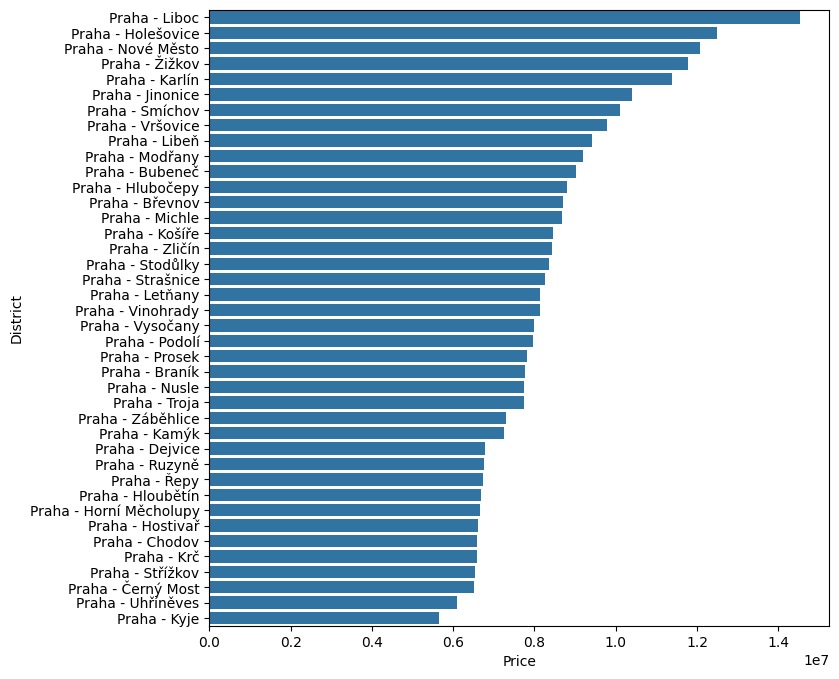

In [102]:
average_prices2 = clean_data3.groupby('District')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(average_prices2, orient='h')

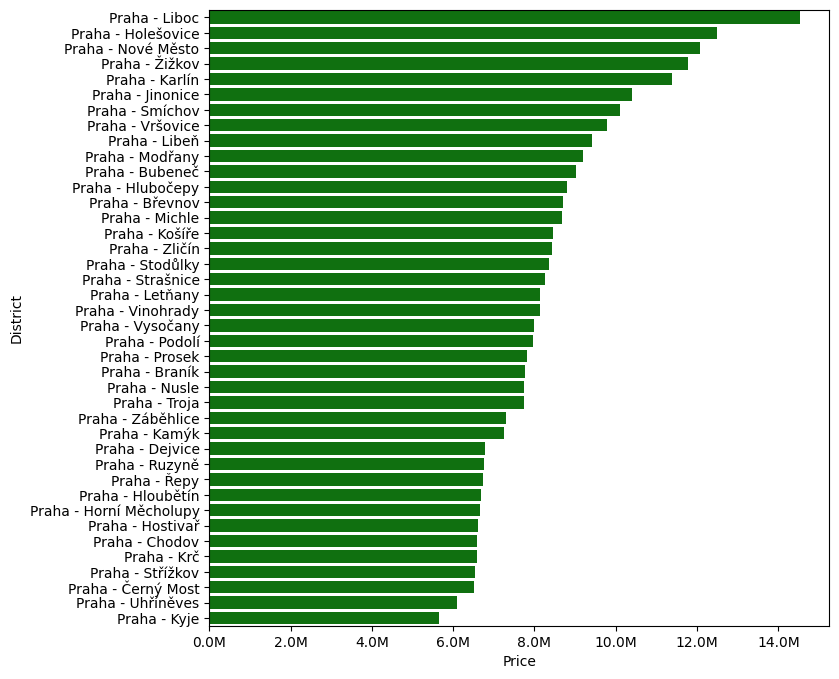

In [119]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

plt.figure(figsize=(8, 8))
ax = sns.barplot(average_prices2, orient='h', color='green')
ax.xaxis.set_major_formatter(FuncFormatter(millions))
plt.show()

In [105]:
average_prices3 = clean_data3.groupby('District')['Price'].mean().sort_values(ascending=False)

order_dist2 = average_prices3.index.tolist()
clean_data3['District'] = pd.Categorical(clean_data3['District'], categories=order_dist2, ordered=True)

<ipython-input-105-e235371d8383>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data3['District'] = pd.Categorical(clean_data3['District'], categories=order_dist2, ordered=True)


<Figure size 1000x800 with 0 Axes>

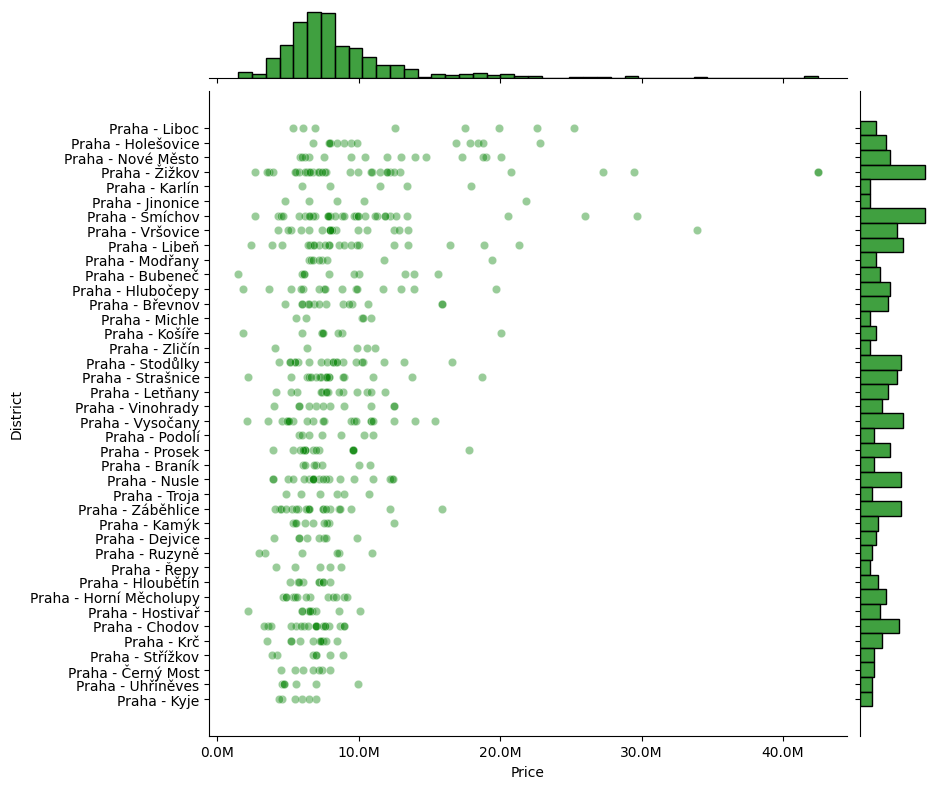

In [118]:
plt.figure(figsize=(10, 8))
g = sns.jointplot(clean_data3, x="Price", y="District", color="green", joint_kws=dict(alpha=0.4), height=8, ratio=8)
g.ax_joint.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.show()

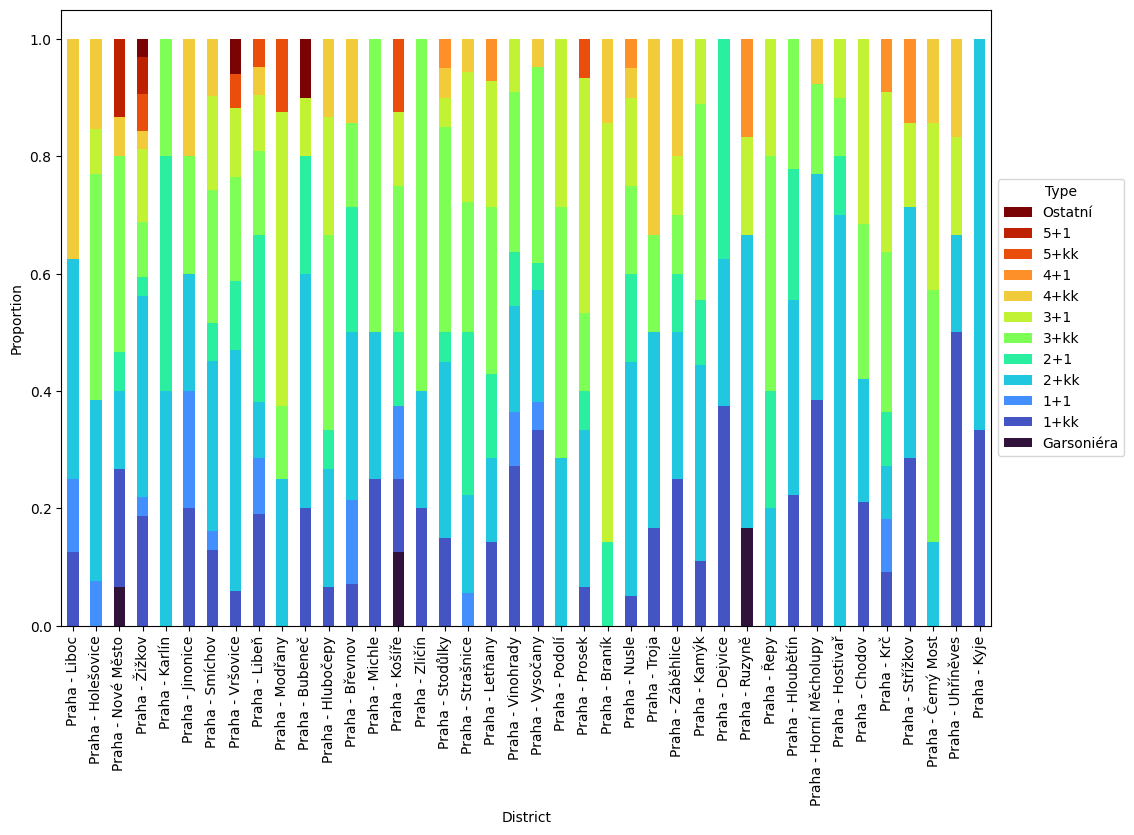

In [116]:
type_district_crosstab2 = pd.crosstab(clean_data3['District'], clean_data3['Type'])
type_district_proportions2 = type_district_crosstab2.div(type_district_crosstab2.sum(axis=1), axis=0)

ax = type_district_proportions2.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='turbo')
plt.ylabel('Proportion')
plt.xlabel('District')
plt.xticks(rotation=90)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Type', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

<Figure size 1000x800 with 0 Axes>

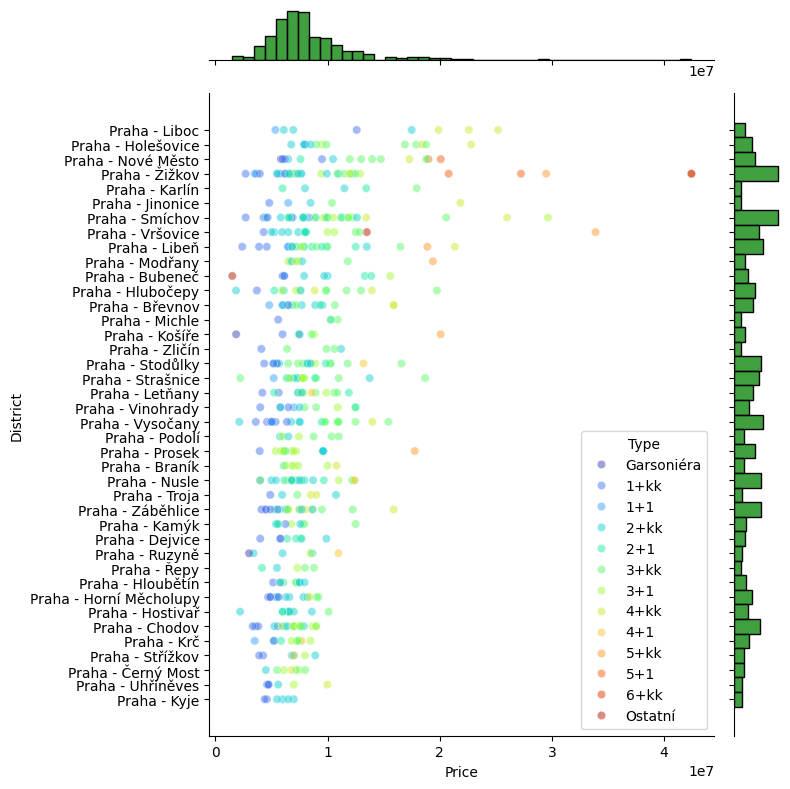

In [117]:
plt.figure(figsize=(10, 8))
g = sns.JointGrid(data=clean_data3, x="Price", y="District", height=8, ratio=8, space=0)

sns.scatterplot(data=clean_data3, x="Price", y="District", hue="Type", palette=palette, ax=g.ax_joint, alpha=0.5)

sns.histplot(data=clean_data3, x="Price", color="green", ax=g.ax_marg_x)
sns.histplot(data=clean_data3, y="District", color="green", ax=g.ax_marg_y, orientation="horizontal")
g.ax_joint.legend(title='Type')
plt.tight_layout()
plt.show()